In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df=pd.read_csv("fleet vehicle.csv")
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [3]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [4]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

<AxesSubplot:>

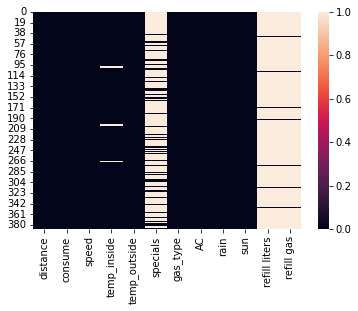

In [5]:
sb.heatmap(df.isnull())

In [6]:
df.drop(["refill gas", "refill liters", "specials"],axis=1,inplace=True)

<AxesSubplot:>

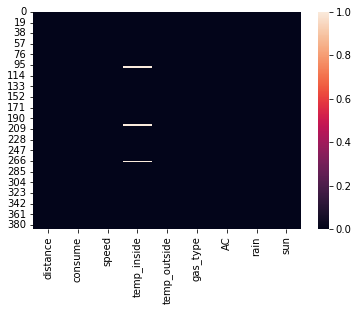

In [7]:
sb.heatmap(df.isnull())

In [8]:
from scipy import stats as st

temp_inside_mode=st.mode(df["temp_inside"])

In [9]:
print(temp_inside_mode)

ModeResult(mode=array([21.5]), count=array([133]))


In [10]:
df["temp_inside"].fillna(21.5,inplace=True)

<AxesSubplot:>

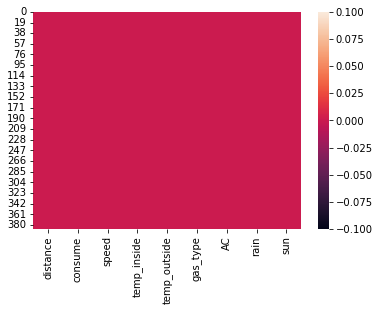

In [11]:
sb.heatmap(df.isnull())

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [13]:
x=df.drop(["consume","gas_type"],axis=1)

In [14]:
y=df["consume"]

In [15]:
x.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain',
       'sun'],
      dtype='object')

In [16]:
x=x.values
y=y.values

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
l.fit(x_train,y_train)

LinearRegression()

In [19]:
x_train.shape

(271, 7)

In [20]:
y_pred=l.predict(x_test)

In [21]:
print(l.coef_,l.intercept_)

[ 0.00522587 -0.02372206 -0.13840986 -0.03755174  0.40791018  0.61792887
 -0.06793951] 9.200515024224494


In [22]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.7394867505392348
0.6618174831875431
0.8599341547695584


In [23]:
dum1=pd.get_dummies(df["gas_type"])
print(dum1)

     E10  SP98
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0
..   ...   ...
383    0     1
384    0     1
385    0     1
386    0     1
387    0     1

[388 rows x 2 columns]


In [24]:
df=pd.concat([df,dum1],axis=1)

In [25]:
df.drop("gas_type",axis=1,inplace=True)

In [26]:
x1=df.drop("consume",axis=1)

In [27]:
y1=df["consume"]

In [28]:
x1.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun',
       'E10', 'SP98'],
      dtype='object')

In [29]:
x1=x1.values
y1=y1.values

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [31]:
l.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred_1=l.predict(x_test)
print(y_pred_1)

[4.8010055  5.24233746 5.15999929 5.22927905 4.52523095 5.99189945
 5.72277323 5.22775047 5.9007414  4.9410447  4.10141759 4.78225759
 6.53892149 4.49643398 5.1209254  5.22994545 5.60826102 5.15135227
 5.46530554 5.35873807 4.1464217  5.300414   4.94137509 5.2285011
 4.88369076 4.78942089 4.54933641 4.27708679 5.09776137 3.91953769
 4.97837775 5.28931916 4.74361355 4.56508113 5.52795088 5.02680252
 4.64061001 4.04633706 5.08516994 6.15794902 4.46952324 5.28061965
 5.35891189 4.440296   4.68920003 4.38552997 5.10639182 5.18037766
 4.93945581 4.99652299 4.86870077 5.42297062 5.44421775 5.27631372
 4.60630275 4.90279472 6.67863641 5.34977235 4.71159913 4.84386228
 5.50243795 4.9269189  4.55093581 4.8084324  4.35803409 4.75176906
 5.55479082 4.3437652  4.81724338 4.9125389  4.29977435 4.65416824
 5.18344536 4.96666743 5.18081388 4.85790895 5.31432057 5.11111505
 5.38563507 5.16194155 5.26459685 5.44126892 4.47679366 5.3574467
 5.72420681 4.42599882 5.51288164 5.75773496 5.17139113 4.574140

In [33]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

0.8629551717357996


In [34]:
x_train.shape

(271, 9)

In [35]:
x_train[0]

array([12.3, 62. , 21.5,  6. ,  0. ,  0. ,  0. ,  1. ,  0. ])

In [36]:
import joblib
joblib.dump(l,"model.save")

['model.save']